In [1]:
try:
  print("Dependencies are already installed. Skipping...")
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
except:
  print("Installing Corresponing Dependencies")
  ! pip install qiskit
  ! pip install pylatexenc
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile

Dependencies are already installed. Skipping...


In [2]:
# fetch backend
backend = Aer.get_backend('statevector_simulator')

In [3]:
!rm -r modules

In [4]:
# import modules
import requests
from pathlib import Path
import os


directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)
  
helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)

In [5]:
from modules.experiment_utils import ideal_qc_simulation,get_target_measurement,initialize_quantum_circuit,reverse_output,make_meaurement

# Quantum ALU Circuit:

In [6]:
NUM_QUBIT = 7
NUM_MEASUEREMENTS = 1

In [7]:
qr = QuantumRegister(NUM_QUBIT)
cr = ClassicalRegister(NUM_MEASUEREMENTS)
qc = QuantumCircuit(qr,cr)

In [8]:
# dictionary 
operations = {
    '+':'11000',
    '-':'11100',
    'xor':'10000',
    'xnor':'10100',
    '+1':'11010',
    '-1':'11111',
    'neg':'00100'
}

In [9]:
targets = [int(c) for c in operations["-1"]] # opertion opcode (change)
input_init = [0,1] # input (change)
targets += input_init
initialized_qubits = [i for (i,val) in enumerate(targets) if val == 1]
initialized_qubits

[0, 1, 2, 3, 4, 6]

In [10]:
initialize_quantum_circuit(qc,initialized_qubits)
qc.barrier()

In [11]:
# implement circuit 
qc.csx(0,6)
qc.csx(5,6)
qc.cx(0,5)
qc.crx(- math.pi / 2,5,6)
qc.cx(0,5)
qc.csx(1,6)
qc.csx(3,6)
qc.cx(1,3)
qc.crx(- math.pi / 2,3,6)
qc.cx(2,6)
qc.cx(4,6)

In [12]:
qc.barrier()

In [13]:
output_qubits = [-1]

In [14]:
qc.measure(qr[-1],cr[0])

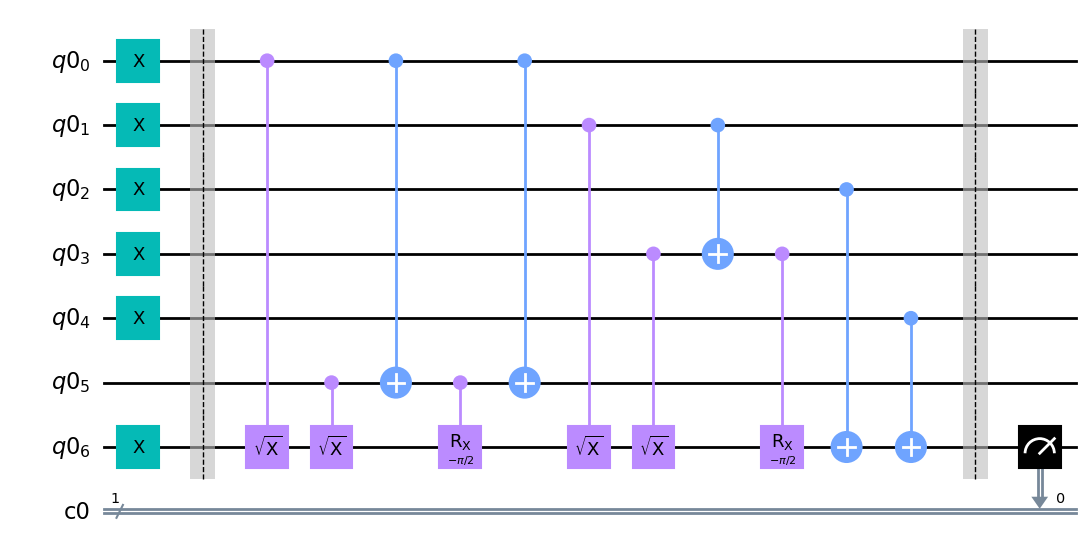

In [15]:
qc.draw("mpl")

In [16]:
output = ideal_qc_simulation(qc,backend,1)
output = list(output.keys())[0]
output = reverse_output(output)
output

'0'

# Function

In [20]:
def quantum_alu():
  qr = QuantumRegister(7)
  qc = QuantumCircuit(qr)
  # implement circuit 
  qc.csx(0,6)
  qc.csx(5,6)
  qc.cx(0,5)
  qc.crx(- math.pi / 2,5,6)
  qc.cx(0,5)
  qc.csx(1,6)
  qc.csx(3,6)
  qc.cx(1,3)
  qc.crx(- math.pi / 2,3,6)
  qc.cx(2,6)
  qc.cx(4,6)
  return qc, {
      '+':'11000',
      '-':'11100',
      'xor':'10000',
      'xnor':'10100',
      '+1':'11010',
      '-1':'11111',
      'neg':'00100'
  }

In [18]:
qc,opcodes = quantum_alu()
opcodes

{'+': '11000',
 '-': '11100',
 'xor': '10000',
 'xnor': '10100',
 '+1': '11010',
 '-1': '11111',
 'neg': '00100'}

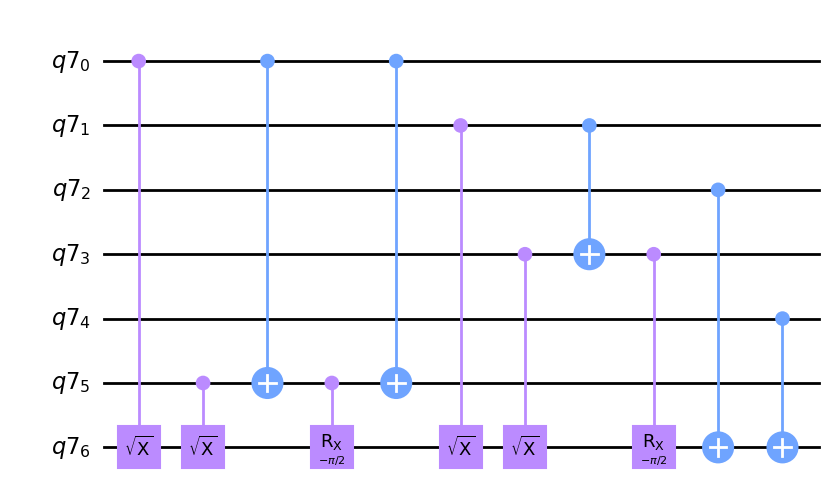

In [19]:
qc.draw("mpl")